In [36]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


quandl.ApiConfig.api_key = 'xpLpDBByVG29tYUiuq27'

df = quandl.get("WIKI/AAPL")
df = df[["Adj. Close"]]
df.head()



,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536


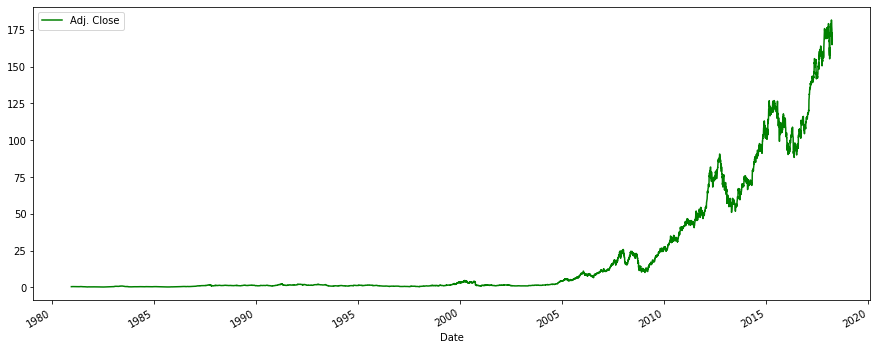

In [37]:
df["Adj. Close"].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()




In [38]:
forecast = 365
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

x = np.array(df.drop(["Prediction"], 1))

x = preprocessing.scale(x)

x_forecast = x[-forecast:]
x = x[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(x_train, y_train)

confidence = clf.score(x_test, y_test)

forecast_predicted = clf.predict(x_forecast)
forecast_predicted


array([143.94738865, 145.21727525, 144.77769912, 145.57137825,
       145.47369467, 145.37601108, 144.9486454 , 144.87538271,
       144.31370209, 145.59579915, 146.32842604, 143.08044683,
       141.72508708, 140.79709302, 140.57730496, 138.07416308,
       138.19626757, 136.74322423, 135.52811621, 137.4551057 ,
       138.2529039 , 138.03197517, 134.23936528, 135.02488966,
       131.68641105, 133.40474563, 136.93960533, 136.89051006,
       137.02552206, 139.07524973, 139.16116646, 138.46155881,
       139.14889264, 138.87886864, 138.74385664, 137.59011771,
       136.32591441, 136.82914096, 135.85950931, 136.89051006,
       138.21608244, 139.55392865, 141.80003742, 141.00223922,
       143.3219909 , 143.3219909 , 144.09524146, 144.27934874,
       145.10169457, 145.48218295, 145.61719495, 144.67211093,
       144.95440875, 145.86267132, 145.2489804 , 145.21215894,
       144.09524146, 144.50027747, 144.34071783, 145.06487312,
       146.66046951, 147.9860419 , 148.13332772, 148.91

(17282.0, 18681.2)

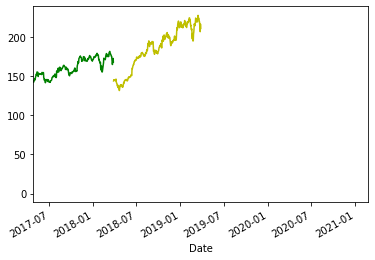

In [42]:
start = "2018-03-28"
end = "2019-03-27"
dates = pd.date_range(start = start, end = end)
plt.plot(dates, forecast_predicted, color = 'y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin = datetime.date(2017,4,26))